In [71]:
import numpy as np #科學運算
import matplotlib.pyplot as plt #繪圖工具
from matplotlib.colors import ListedColormap #上色工具
from sklearn import neighbors, datasets

from sklearn.datasets.samples_generator import make_classification #X為樣本特徵,y
X, y = make_classification(n_samples = 5, n_features = 4, n_informative=3, n_redundant = 0, n_classes = 3) # n_classes為類別, n_informative為資訊量, n_informative, n_redundant, n_repeated總和要小於n_feature

In [72]:
X #顯示出隨機產生的座標


array([[ 0.34329577,  0.986889  , -0.3966068 ,  0.83975487],
       [ 0.08984198, -1.65983677, -1.68810303, -0.31531141],
       [-2.14382341, -1.43736784,  0.25422729, -0.97026781],
       [-1.12579919, -2.32765035, -0.72177797, -1.54793669],
       [-0.1058921 , -1.42539573,  0.84722702, -0.84172949]])

In [73]:
y #兩點各代表一個類別,第一類用"0"表示,第二類用"1"表示

array([0, 0, 1, 1, 2])

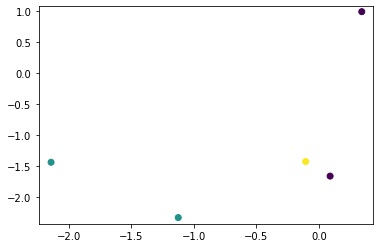

In [74]:
clf = neighbors.KNeighborsClassifier(n_neighbors = 1) #建立模型
clf.fit(X, y) #用KNN來擬合模型,我們選擇K=1，權重為距離遠近
h = 0.02 #網路中的步長 確認訓練集的邊界 生成隨機數據來做測試集, 然後做預測
x_min, x_max = X[:, 0].min()-0.1 ,X[:, 0].max()+0.1
y_min, y_max = X[:, 1].min()-0.1 ,X[:, 1].max()+0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) #建立取樣點

plt.scatter(X[:,0], X[:,1], marker='o', c=y)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show() #根據隨機生成樣本不同，圖形也不同